# Stereoisomer testing on ChiENN - enantiomers/diastereomers (multiple centers)

## Importing section

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import sys
sys.path.append("../../../../")

from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
from ptgnn.features.chienn.mol_to_data import mol_to_data
from ptgnn.transform import edge_graph_transform, vertex_graph_transform

## Define SMILES strings

In [2]:
smiles_list = [
    "O=C[C@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@@]([H])(O)C=O",
    
    "O=C[C@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@@]([H])(O)C=O",
]

## Visualize and confirm stereomer classification (E/Z)

In [3]:
def showAndChiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(AllChem.FindMolChiralCenters(mol))
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())

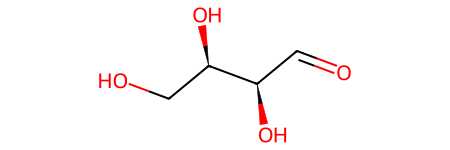

[(2, 'S'), (4, 'R')]
Bond 0 stereo: STEREONONE


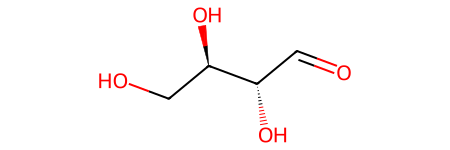

[(2, 'R'), (4, 'R')]
Bond 0 stereo: STEREONONE


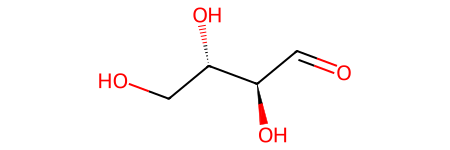

[(2, 'S'), (4, 'S')]
Bond 0 stereo: STEREONONE


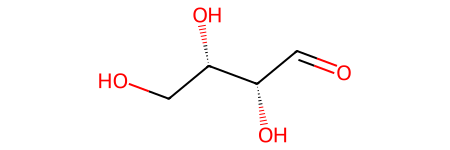

[(2, 'R'), (4, 'S')]
Bond 0 stereo: STEREONONE


In [4]:
for smile in smiles_list:
    showAndChiral(smile)

##  Convert to (edge) graph with ptree

In [5]:
# get molecules
mol_list = [
    smiles_to_3d_mol(
        smiles,
        max_number_of_attempts=100,
        max_number_of_atoms=100
    )
    for smiles in smiles_list
]

In [6]:
data_list = [
    mol_to_data(mol)
    for mol in mol_list
]

In [7]:
data_list = [
    vertex_graph_transform(
        data,
        transformation_mode="permutation_tree",
        mol=mol,
        transformation_parameters={
            'k':  3,
            'tetrahedral_chiral': False,
            'chiral_center_selective': True,
            'chiral_center_select_potential': False,
            'multi_stereo_center_dia': True
        }
    )
    for data, mol in zip(data_list, mol_list)
]

In [8]:
d = data_list[0]
display(d.ptree, d.initial_map)
for i in range(d.num_layer):
    display(f"layer: {i}")
    display(d[f"layer{i}_order_matrix"], d[f"layer{i}_type_mask"], d[f"layer{i}_pooling"])

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 8]}]}',
 '{"S": [2, {"P": [1, 3, 4, 9]}]}',
 '{"S": [3, {"P": [2, 10]}]}',
 '{"S": [4, {"P": [2, 5, 6, 11]}]}',
 '{"S": [5, {"P": [4, 12]}]}',
 '{"S": [6, {"P": [4, 7, 13, 14]}]}',
 '{"S": [7, {"P": [6, 15]}]}',
 '{"S": [8, {"P": [1]}]}',
 '{"S": [9, {"P": [2]}]}',
 '{"S": [10, {"P": [3]}]}',
 '{"S": [11, {"P": [4]}]}',
 '{"S": [12, {"P": [5]}]}',
 '{"S": [13, {"P": [6]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [7]}]}',
 '{"P": [{"P": [{"Z": [5, 11, 6]}, {"Z": [1, 3, 9]}]}, {"P": [{"Z": [6, 11, 5]}, {"Z": [9, 3, 1]}]}]}']

tensor([ 0,  1,  1,  0,  2,  8,  2,  1,  3,  4,  9,  3,  2, 10,  4,  2,  5,  6,
        11,  5,  4, 12,  6,  4,  7, 13, 14,  7,  6, 15,  8,  1,  9,  2, 10,  3,
        11,  4, 12,  5, 13,  6, 14,  6, 15,  7,  5, 11,  6,  1,  3,  9,  6, 11,
         5,  9,  3,  1])

'layer: 0'

[[tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
           18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
           36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
           54, 55, 56, 57],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 47, 48, 46, 50, 51, 49, 53, 54,
           52, 56, 57, 55],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, 46, 47, 51, 49, 50, 54, 52,
           53, 57, 55, 56]], dtype=torch.int32)]]

[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]]

[[tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 46, 47, 47, 47, 48, 48,
          48, 49, 49, 49])]]

'layer: 1'

[[tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 11, 12, 13, 14, 15, 16, 17,
           -1, 19, 20, 21, 22, 23, 24, 25, -1, 27, 28, 29, 30, 31, 32, 33, 34, 35,
           36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
         dtype=torch.int32)]]

[[tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
          1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
          1, 1])]]

[[tensor([ 0,  1,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  7,  7,  8,  9,  9,  9,
           9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
          22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 33])]]

'layer: 2'

[[tensor([[ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1,
           18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, 33],
          [ 1, -1,  3, -1,  5, -1,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17, -1,
           19, -1, 21, -1, 23, -1, 25, -1, 27, -1, 29, -1, 31, -1, -1, -1],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
         dtype=torch.int32)]]

[[tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 1, 1])]]

[[tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
           9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16])]]

In [9]:
for data in data_list:
    print(data)
    print(data.ptree)

Data(x=[17, 43], edge_index=[2, 30], edge_attr=[30, 7], pos=[16, 3], ptree=[17], initial_map=[58], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])
['{"S": [0, {"P": [1]}]}', '{"S": [1, {"P": [0, 2, 8]}]}', '{"S": [2, {"P": [1, 3, 4, 9]}]}', '{"S": [3, {"P": [2, 10]}]}', '{"S": [4, {"P": [2, 5, 6, 11]}]}', '{"S": [5, {"P": [4, 12]}]}', '{"S": [6, {"P": [4, 7, 13, 14]}]}', '{"S": [7, {"P": [6, 15]}]}', '{"S": [8, {"P": [1]}]}', '{"S": [9, {"P": [2]}]}', '{"S": [10, {"P": [3]}]}', '{"S": [11, {"P": [4]}]}', '{"S": [12, {"P": [5]}]}', '{"S": [13, {"P": [6]}]}', '{"S": [14, {"P": [6]}]}', '{"S": [15, {"P": [7]}]}', '{"P": [{"P": [{"Z": [5, 11, 6]}, {"Z": [1, 3, 9]}]}, {"P": [{"Z": [6, 11, 5]}, {"Z": [9, 3, 1]}]}]}']
Data(x=[17, 43], edge_index=[2, 30], edge_attr=[30, 7], pos=[16, 3], ptree=[17], initial_map=[58], layer0_order_m

## Create Model

In [10]:
import torch
from ptgnn.model.modules.custom_wrapper import CustomWrapper
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

modules_list = [
    CustomWrapper(AdvancedPermutationTreeLayer(
        hidden_dim=43,
        k=k
    ))
    for _ in range(2)
] + [
    AdvancedPermutationTreeLayer(
        hidden_dim=43,
        k=k
    )
]

model = torch.nn.Sequential(
    *modules_list
)
model

Sequential(
  (0): CustomWrapper(
    (layer_to_wrap): AdvancedPermutationTreeLayer(
      (p_layer): Linear(in_features=43, out_features=43, bias=False)
      (p_final_layer): Linear(in_features=43, out_features=43, bias=False)
      (z_layer): ModuleList(
        (0-2): 3 x Linear(in_features=43, out_features=43, bias=False)
      )
      (z_final_layer): Linear(in_features=43, out_features=43, bias=False)
      (s_layer): ModuleList(
        (0-2): 3 x Linear(in_features=43, out_features=43, bias=False)
      )
      (s_final_layer): Linear(in_features=43, out_features=43, bias=False)
      (elu): ELU(alpha=1.0)
      (batch_norm): BatchNorm1d(43, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): CustomWrapper(
    (layer_to_wrap): AdvancedPermutationTreeLayer(
      (p_layer): Linear(in_features=43, out_features=43, bias=False)
      (p_final_layer): Linear(in_features=43, out_features=43, bias=False)
      (z_layer): ModuleList(
        (0-2): 3 x Li

## Create batches

In [11]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [12]:
for idx, batch in enumerate(batch_list):
    display(f"Batch: {idx}")
    display(batch.ptree)
    display(batch.initial_map)
    for layer_idx in range(batch.num_layer):
        display(f"Layer: {layer_idx}")
        display(
            batch[f"layer{layer_idx}_order_matrix"],
            batch[f"layer{layer_idx}_type_mask"],
            batch[f"layer{layer_idx}_pooling"]
        )

'Batch: 0'

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 8]}]}',
 '{"S": [2, {"P": [1, 3, 4, 9]}]}',
 '{"S": [3, {"P": [2, 10]}]}',
 '{"S": [4, {"P": [2, 5, 6, 11]}]}',
 '{"S": [5, {"P": [4, 12]}]}',
 '{"S": [6, {"P": [4, 7, 13, 14]}]}',
 '{"S": [7, {"P": [6, 15]}]}',
 '{"S": [8, {"P": [1]}]}',
 '{"S": [9, {"P": [2]}]}',
 '{"S": [10, {"P": [3]}]}',
 '{"S": [11, {"P": [4]}]}',
 '{"S": [12, {"P": [5]}]}',
 '{"S": [13, {"P": [6]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [7]}]}',
 '{"P": [{"P": [{"Z": [5, 11, 6]}, {"Z": [1, 3, 9]}]}, {"P": [{"Z": [6, 11, 5]}, {"Z": [9, 3, 1]}]}]}']

tensor([ 0,  1,  1,  0,  2,  8,  2,  1,  3,  4,  9,  3,  2, 10,  4,  2,  5,  6,
        11,  5,  4, 12,  6,  4,  7, 13, 14,  7,  6, 15,  8,  1,  9,  2, 10,  3,
        11,  4, 12,  5, 13,  6, 14,  6, 15,  7,  5, 11,  6,  1,  3,  9,  6, 11,
         5,  9,  3,  1])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 47, 48, 46, 50, 51, 49, 53, 54,
         52, 56, 57, 55],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, 46, 47, 51, 49, 50, 54, 52,
         53, 57, 55, 56]], dtype=torch.int32)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 46, 47, 47, 47, 48, 48,
        48, 49, 49, 49])

'Layer: 1'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 11, 12, 13, 14, 15, 16, 17,
         -1, 19, 20, 21, 22, 23, 24, 25, -1, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1])

tensor([ 0,  1,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  7,  7,  8,  9,  9,  9,
         9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 33])

'Layer: 2'

tensor([[ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1,
         18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, 33],
        [ 1, -1,  3, -1,  5, -1,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17, -1,
         19, -1, 21, -1, 23, -1, 25, -1, 27, -1, 29, -1, 31, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
         9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16])

'Batch: 1'

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 8]}]}',
 '{"S": [2, {"P": [1, 3, 4, 9]}]}',
 '{"S": [3, {"P": [2, 10]}]}',
 '{"S": [4, {"P": [2, 5, 6, 11]}]}',
 '{"S": [5, {"P": [4, 12]}]}',
 '{"S": [6, {"P": [4, 7, 13, 14]}]}',
 '{"S": [7, {"P": [6, 15]}]}',
 '{"S": [8, {"P": [1]}]}',
 '{"S": [9, {"P": [2]}]}',
 '{"S": [10, {"P": [3]}]}',
 '{"S": [11, {"P": [4]}]}',
 '{"S": [12, {"P": [5]}]}',
 '{"S": [13, {"P": [6]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [7]}]}',
 '{"P": [{"P": [{"Z": [5, 11, 6]}, {"Z": [1, 9, 3]}]}, {"P": [{"Z": [6, 11, 5]}, {"Z": [3, 9, 1]}]}]}']

tensor([ 0,  1,  1,  0,  2,  8,  2,  1,  3,  4,  9,  3,  2, 10,  4,  2,  5,  6,
        11,  5,  4, 12,  6,  4,  7, 13, 14,  7,  6, 15,  8,  1,  9,  2, 10,  3,
        11,  4, 12,  5, 13,  6, 14,  6, 15,  7,  5, 11,  6,  1,  9,  3,  6, 11,
         5,  3,  9,  1])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 47, 48, 46, 50, 51, 49, 53, 54,
         52, 56, 57, 55],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, 46, 47, 51, 49, 50, 54, 52,
         53, 57, 55, 56]], dtype=torch.int32)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 46, 47, 47, 47, 48, 48,
        48, 49, 49, 49])

'Layer: 1'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 11, 12, 13, 14, 15, 16, 17,
         -1, 19, 20, 21, 22, 23, 24, 25, -1, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1])

tensor([ 0,  1,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  7,  7,  8,  9,  9,  9,
         9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 33])

'Layer: 2'

tensor([[ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1,
         18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, 33],
        [ 1, -1,  3, -1,  5, -1,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17, -1,
         19, -1, 21, -1, 23, -1, 25, -1, 27, -1, 29, -1, 31, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
         9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16])

'Batch: 2'

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 8]}]}',
 '{"S": [2, {"P": [1, 3, 4, 9]}]}',
 '{"S": [3, {"P": [2, 10]}]}',
 '{"S": [4, {"P": [2, 5, 6, 11]}]}',
 '{"S": [5, {"P": [4, 12]}]}',
 '{"S": [6, {"P": [4, 7, 13, 14]}]}',
 '{"S": [7, {"P": [6, 15]}]}',
 '{"S": [8, {"P": [1]}]}',
 '{"S": [9, {"P": [2]}]}',
 '{"S": [10, {"P": [3]}]}',
 '{"S": [11, {"P": [4]}]}',
 '{"S": [12, {"P": [5]}]}',
 '{"S": [13, {"P": [6]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [7]}]}',
 '{"P": [{"P": [{"Z": [5, 6, 11]}, {"Z": [1, 3, 9]}]}, {"P": [{"Z": [11, 6, 5]}, {"Z": [9, 3, 1]}]}]}']

tensor([ 0,  1,  1,  0,  2,  8,  2,  1,  3,  4,  9,  3,  2, 10,  4,  2,  5,  6,
        11,  5,  4, 12,  6,  4,  7, 13, 14,  7,  6, 15,  8,  1,  9,  2, 10,  3,
        11,  4, 12,  5, 13,  6, 14,  6, 15,  7,  5,  6, 11,  1,  3,  9, 11,  6,
         5,  9,  3,  1])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 47, 48, 46, 50, 51, 49, 53, 54,
         52, 56, 57, 55],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, 46, 47, 51, 49, 50, 54, 52,
         53, 57, 55, 56]], dtype=torch.int32)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 46, 47, 47, 47, 48, 48,
        48, 49, 49, 49])

'Layer: 1'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 11, 12, 13, 14, 15, 16, 17,
         -1, 19, 20, 21, 22, 23, 24, 25, -1, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1])

tensor([ 0,  1,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  7,  7,  8,  9,  9,  9,
         9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 33])

'Layer: 2'

tensor([[ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1,
         18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, 33],
        [ 1, -1,  3, -1,  5, -1,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17, -1,
         19, -1, 21, -1, 23, -1, 25, -1, 27, -1, 29, -1, 31, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
         9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16])

'Batch: 3'

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 8]}]}',
 '{"S": [2, {"P": [1, 3, 4, 9]}]}',
 '{"S": [3, {"P": [2, 10]}]}',
 '{"S": [4, {"P": [2, 5, 6, 11]}]}',
 '{"S": [5, {"P": [4, 12]}]}',
 '{"S": [6, {"P": [4, 7, 13, 14]}]}',
 '{"S": [7, {"P": [6, 15]}]}',
 '{"S": [8, {"P": [1]}]}',
 '{"S": [9, {"P": [2]}]}',
 '{"S": [10, {"P": [3]}]}',
 '{"S": [11, {"P": [4]}]}',
 '{"S": [12, {"P": [5]}]}',
 '{"S": [13, {"P": [6]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [7]}]}',
 '{"P": [{"P": [{"Z": [5, 6, 11]}, {"Z": [1, 9, 3]}]}, {"P": [{"Z": [11, 6, 5]}, {"Z": [3, 9, 1]}]}]}']

tensor([ 0,  1,  1,  0,  2,  8,  2,  1,  3,  4,  9,  3,  2, 10,  4,  2,  5,  6,
        11,  5,  4, 12,  6,  4,  7, 13, 14,  7,  6, 15,  8,  1,  9,  2, 10,  3,
        11,  4, 12,  5, 13,  6, 14,  6, 15,  7,  5,  6, 11,  1,  9,  3, 11,  6,
         5,  3,  9,  1])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 47, 48, 46, 50, 51, 49, 53, 54,
         52, 56, 57, 55],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, 46, 47, 51, 49, 50, 54, 52,
         53, 57, 55, 56]], dtype=torch.int32)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 46, 47, 47, 47, 48, 48,
        48, 49, 49, 49])

'Layer: 1'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 11, 12, 13, 14, 15, 16, 17,
         -1, 19, 20, 21, 22, 23, 24, 25, -1, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1])

tensor([ 0,  1,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  7,  7,  8,  9,  9,  9,
         9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 33])

'Layer: 2'

tensor([[ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1,
         18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, 33],
        [ 1, -1,  3, -1,  5, -1,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17, -1,
         19, -1, 21, -1, 23, -1, 25, -1, 27, -1, 29, -1, 31, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]],
       dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
         9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16])

In [13]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [14]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [15]:
out_list

[tensor([[-9.9140e-03,  2.1712e-03,  2.0020e-03,  1.3524e-02, -1.3467e-03,
           1.0684e-02,  6.1147e-03,  6.0000e-03,  7.9180e-03, -1.3510e-02,
          -1.8432e-03, -2.2621e-03,  7.1239e-03, -1.2622e-02, -4.1569e-03,
          -2.2418e-03,  9.4806e-03, -6.8784e-03, -8.0673e-03, -1.7243e-02,
           6.1648e-04, -7.5735e-03, -7.9626e-03,  4.4177e-03, -1.1143e-02,
          -5.2987e-03,  3.6607e-05, -4.8167e-03,  1.0569e-02,  1.7303e-03,
          -3.8434e-03,  7.5772e-03,  1.4413e-02,  6.7743e-03, -1.1110e-04,
          -5.0029e-03, -1.0069e-02,  3.7181e-03,  4.2999e-03, -2.2095e-03,
          -1.6963e-02,  1.4506e-02,  1.3242e-02],
         [-4.3985e-03, -2.0784e-04, -8.2185e-03,  1.6817e-02, -2.7119e-03,
           1.3125e-02, -5.7348e-03,  8.8357e-03, -1.0485e-02,  3.4327e-02,
           1.0620e-02, -6.0791e-03,  9.3132e-03, -6.9640e-03,  2.1209e-02,
           2.4748e-02, -6.9468e-03, -1.9071e-02, -1.7833e-02, -2.1202e-02,
           1.3530e-02, -2.8216e-02,  4.1294e-03, -

## Compare batches

In [16]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [17]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True, False, False, False],
       [False,  True, False,  True],
       [False, False,  True, False],
       [False,  True, False,  True]])

In [18]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[0.0000000e+00, 1.8498395e-07, 1.9994332e-07, 1.6554259e-07],
       [1.8498395e-07, 0.0000000e+00, 1.5058322e-07, 1.6868580e-07],
       [1.9994332e-07, 1.5058322e-07, 0.0000000e+00, 1.7863931e-07],
       [1.6554259e-07, 1.6868580e-07, 1.7863931e-07, 0.0000000e+00]],
      dtype=float32)

Does not distinguish properly. Attempted to solve in similar fashion to distinguishing these MC- enantiomers, however increasing layers did not help. Makes sense as same tree is used as in edge_graph case, the difference only gets smaller.